In [ ]:
from random import random, choices, randrange, choice
from collections import defaultdict
import matplotlib.pyplot as plt
from time import time
import igraph as ig

In [ ]:
n_rep = 50 # 100 # number of repetitions of the simulation
p = 0.2 # initial fraction of infected nodes
t_max = 1000 # maximum number of time steps of each simulation
t_trans = 900 # number of steps of the transitory

In [ ]:
g = ig.load('../real/airports.net') # our graph
vcount = g.vcount() # number of vertices
print(vcount) # to check if it has more than 500 vertices
infected_original = [random() < p for _ in range(vcount)] # True = Infected, False = Susceptible
neighbors = {v.index: [neighbor.index for neighbor in v.neighbors()] for v in g.vs}
# {vertex_id: ids of vertex neighbors}
del g # we dont need it anymore

In [ ]:
def foo(a, b):
    total_avg_r = 0
    for _ in range(n_rep):
        infected_old = infected_original[:]
        infected_new = infected_old[:]
        total_avg_t = 0
        for t in range(t_max):
            for i, state in enumerate(infected_new):
                if state: #=='I'
                    if random() < a:
                        infected_new[i] = False #=='S'
                else: #=='S'
                    for neighbor in neighbors[i]:
                        if infected_old[neighbor] and random() < b:
                            infected_new[i] = True #=='I'
                            break
            infected_old, infected_new = infected_new, infected_old
            if t >= t_trans:
                total_avg_t += sum(infected_new)/vcount
        total_avg_r += total_avg_t/(t_max-t_trans)
    return total_avg_r/n_rep

In [ ]:
start = time()
print(foo(0.5, 0.5))
print(time()-start)

In [ ]:
from glob import glob

small = {}
for path in glob("small/*.txt"):    
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    small[path[11:path.find("_")]] = values

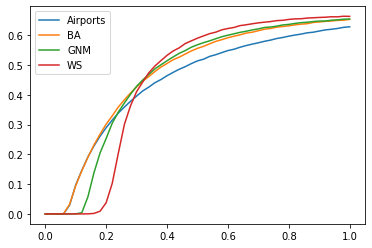

In [183]:
x = [i/50 for i in range(len(small["BA"]))]
for k, v in small.items():
    plt.plot(x, v, label=k)
plt.legend()
plt.show()

In [179]:
big = {}
for path in glob("big/*.txt"):    
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    big[path[7:path.find("_")]] = values

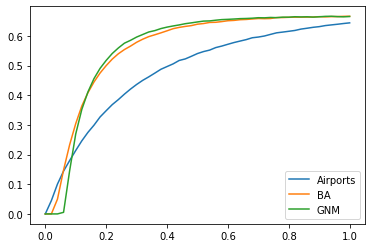

In [184]:
x = [i/50 for i in range(len(big["BA"]))]
for k, v in big.items():
    plt.plot(x, v, label=k)
plt.legend()
plt.show()